In [1]:
%pylab inline
data_dir = "./Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
# !ls -l $data_dir

In [6]:
# !curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  4993k      0  0:00:15  0:00:15 --:--:-- 7117k


In [7]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'STAT.pickle','r'))

In [8]:
# STAT["TMIN"]['eigvec'][1]

In [9]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [10]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
#     !grep $meas './Data/Weather/ghcnd-readme.txt' # 【CHANGED!!!】
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


In [11]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

In [12]:
def setlim(meas):
    xm = (1,365)
    if meas == 'TMIN':
        ym = (-150,250)
    elif meas == 'TOBS':
        ym = (-100,300)
    elif meas == 'TMAX':
        ym = (-50,400)
    elif meas == 'SNOW':
        ym = (-20,30)
    elif meas == 'SNWD':
        ym = (-150,250)
    elif meas == 'PRCP':
        ym = (-60,120)
    else:
        print 'WRONG'
    return ym,xm

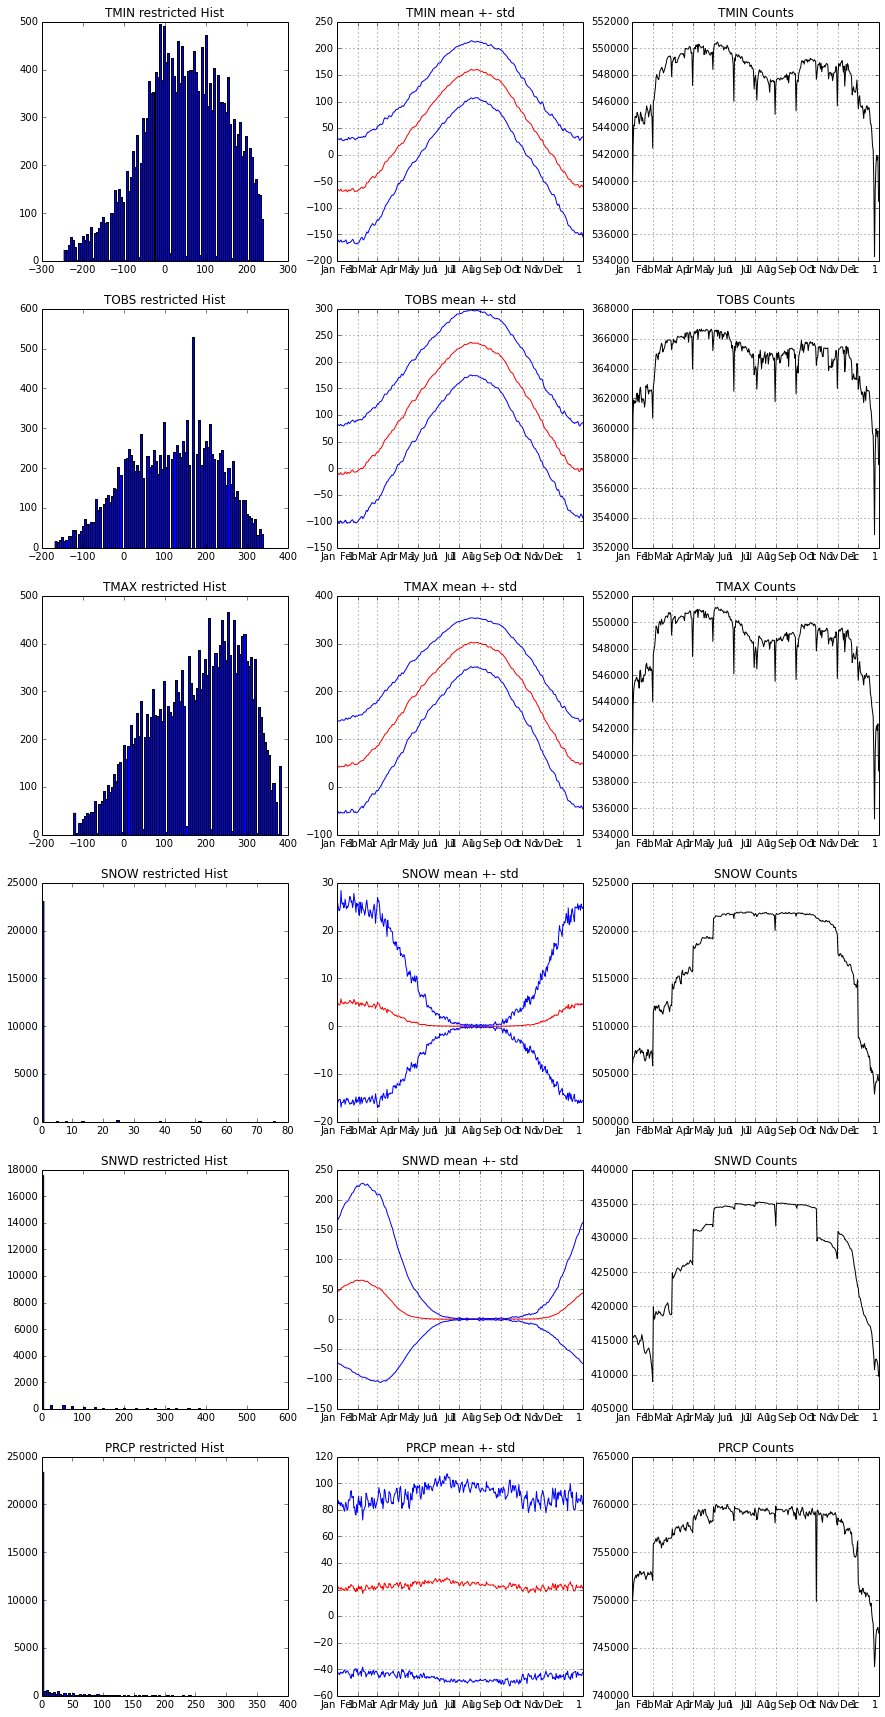

In [13]:
import matplotlib as mpl

figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
#     restrict = []
#     for r in STAT[meas]['SortedVals']:
#         restrict.append(float(r))

    res = filter(lambda x:STAT[meas]['low100']<=x<=STAT[meas]['high100'],STAT[meas]['SortedVals'])
    hist(res,bins=100,color='b');
    title(meas+' restricted Hist')
    
    
    # Mean+-std start, seems wrong
    mpl.rcParams['axes.color_cycle']=['r','b','b']
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std

    YearlyPlots(STAT[meas]['Mean'],ttl = meas+" mean +- std")
    YearlyPlots(STAT[meas]['Mean']+np.sqrt(STAT[meas]['Var']),ttl = meas+" mean +- std")
    YearlyPlots(STAT[meas]['Mean']-np.sqrt(STAT[meas]['Var']),ttl = meas+" mean +- std")
    
    
    # Count seems correct, color need to be black
    mpl.rcParams['axes.color_cycle']=['k']
    subplot(6,3,offset)
    offset+=1
    count = STAT[meas]['NE']
    color=['k']
    YearlyPlots(count,ttl = meas+' Counts')

# Plot the Number of measurements recorded each day for TMAX

In [13]:
# print STAT['TMIN']['NE']

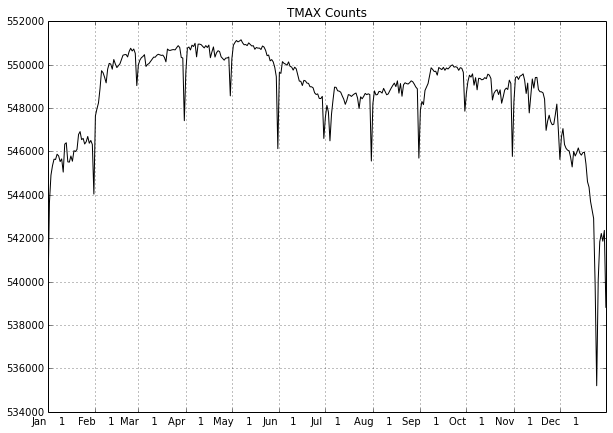

In [14]:
count = STAT['TMAX']['NE']
YearlyPlots(count,ttl = 'TMAX Counts')

# Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


# Answer

## 1.1  These lower counts at the beginning and end of the year

I runned the SampleStations.pickle to get the stations lack of record during Dec.15th ~ Feb.15th every year and found it restricted to a subset of the stations.

As an output of my programming, 69 data lack of all measurements('TMIN','TMAX'……) during 12.15 ~ 2.15 which are shown in (station, year) pair, and these data restricted to 38 stations.

[('USC00294310', 1936.0), ('USC00111841', 1893.0), ('USC00243885', 1895.0), ('USR0000ITEA', 1993.0), ('USC00460580', 1920.0), ('USC00035376', 1923.0), ('USR0000ITEA', 1988.0), ('USC00111841', 1897.0), ('USC00412769', 1964.0), ('USC00460580', 1904.0), ('USC00382386', 1917.0), ('USR0000CMEN', 2008.0), ('USC00257640', 1977.0), ('MX000003074', 1992.0), ('USC00438644', 1976.0), ('USC00294310', 1944.0), ('USC00428741', 1966.0), ('USC00300668', 1980.0), ('USC00088737', 1898.0), ('USC00167161', 1967.0), ('USR0000ITEA', 1994.0), ('USC00293590', 1944.0), ('USC00460580', 1944.0), ('USR0000CMEN', 2007.0), ('USC00257640', 1978.0), ('USC00416000', 1953.0), ('USW00093807', 1900.0), ('USC00024299', 1948.0), ('USC00428600', 1909.0), ('USC00382386', 1936.0), ('USC00082936', 1973.0), ('MX000003074', 1990.0), ('USR0000ITEA', 1986.0), ('USC00235492', 1959.0), ('USC00290125', 1987.0), ('USC00352697', 1948.0), ('USC00227252', 2012.0), ('USR0000ITEA', 1995.0), ('USC00257640', 1981.0), ('USC00164693', 1911.0), ('USC00354939', 1975.0), ('MX000003074', 1975.0), ('USW00012884', 1965.0), ('USC00412769', 1947.0), ('USC00214989', 1929.0), ('USC00460580', 1945.0), ('USC00440188', 2003.0), ('USC00460580', 1919.0), ('USC00043320', 1978.0), ('USC00031457', 1987.0), ('USC00082936', 1968.0), ('MX000003074', 1991.0), ('USW00093807', 1899.0), ('USR0000ITEA', 1987.0), ('USC00053147', 2012.0), ('MX000003074', 1987.0), ('USC00382386', 1952.0), ('USC00294310', 1945.0), ('USR0000ITEA', 1992.0), ('CA001103324', 1981.0), ('USC00113522', 1978.0), ('USC00412769', 1946.0), ('USC00460580', 1903.0), ('USC00412769', 1943.0), ('USC00043320', 1980.0), ('USC00438644', 1967.0), ('USC00428741', 1965.0), ('USC00407979', 1890.0), ('CA004039000', 1919.0)]

Analysis: We can google it to find the information of the station. 

For example:
* Station Name: NC WINSTON SALEM RYNLDS AP 
* GHCN Daily ID: USW00093807
* Latitude: 36.1336
* Longitude: -80.2222
* Elevation: 295.7m

Currently, my assumption is that maybe it is related to some government holiday policies. Because from all the 38 stations, a lof of them start with 'USC'. Also, maybe those stations are lazy. To solve it, we can send them mail to notice them to work harder.

Seeing more deeply, I fount out the records that lack of all measurements during Dec.15 ~ Feb.15. For each of those data in those records,if it is nan, I assigned it 0, else, 1. Then, I plotted the count which is shown in another notebook. I also do the same thing for all the records that at least have 45/60 nan during Dec.15 ~ Feb. 15. Then, I found that, the count of valid measurements increases from the beginning of the year to the end of the year. 

The code are given in a single notebook which is included in rar file.

## 1.2  These lower counts at the end of the months

One idea is that at the end of every month is the day of doing anaylsis and other things, so people do less measurements. Another idea is that maybe there are holidays at the end of some months. 

I also try to do programming to find out those stations that lack of measurements at the end of each months. However, based on my result, I fount these stations is not specially lack of measurements only at the end of each months.

## 1.3  How to remove the effect

To remove this effect, I suggest to remove those data which have more than 300/365 nan and those stations lack of measurements during Dec.15 to Feb.15.  

Also, as I mentioned before, we could send mail to those stations which lack of records to know the reason why it happens and make them work harder.


## 2  The counts per day for "SNWD"

For the counds per day for "SNWD", I think, firstly, it is very hard to do measurement during winter when snowing, but very easy to do during summer, therefore, the count in winter is much lower than in summer. From the plot, we can see that, during each month, the count are relatively the same. The count changes from one month to another. This may be because some station 

# Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

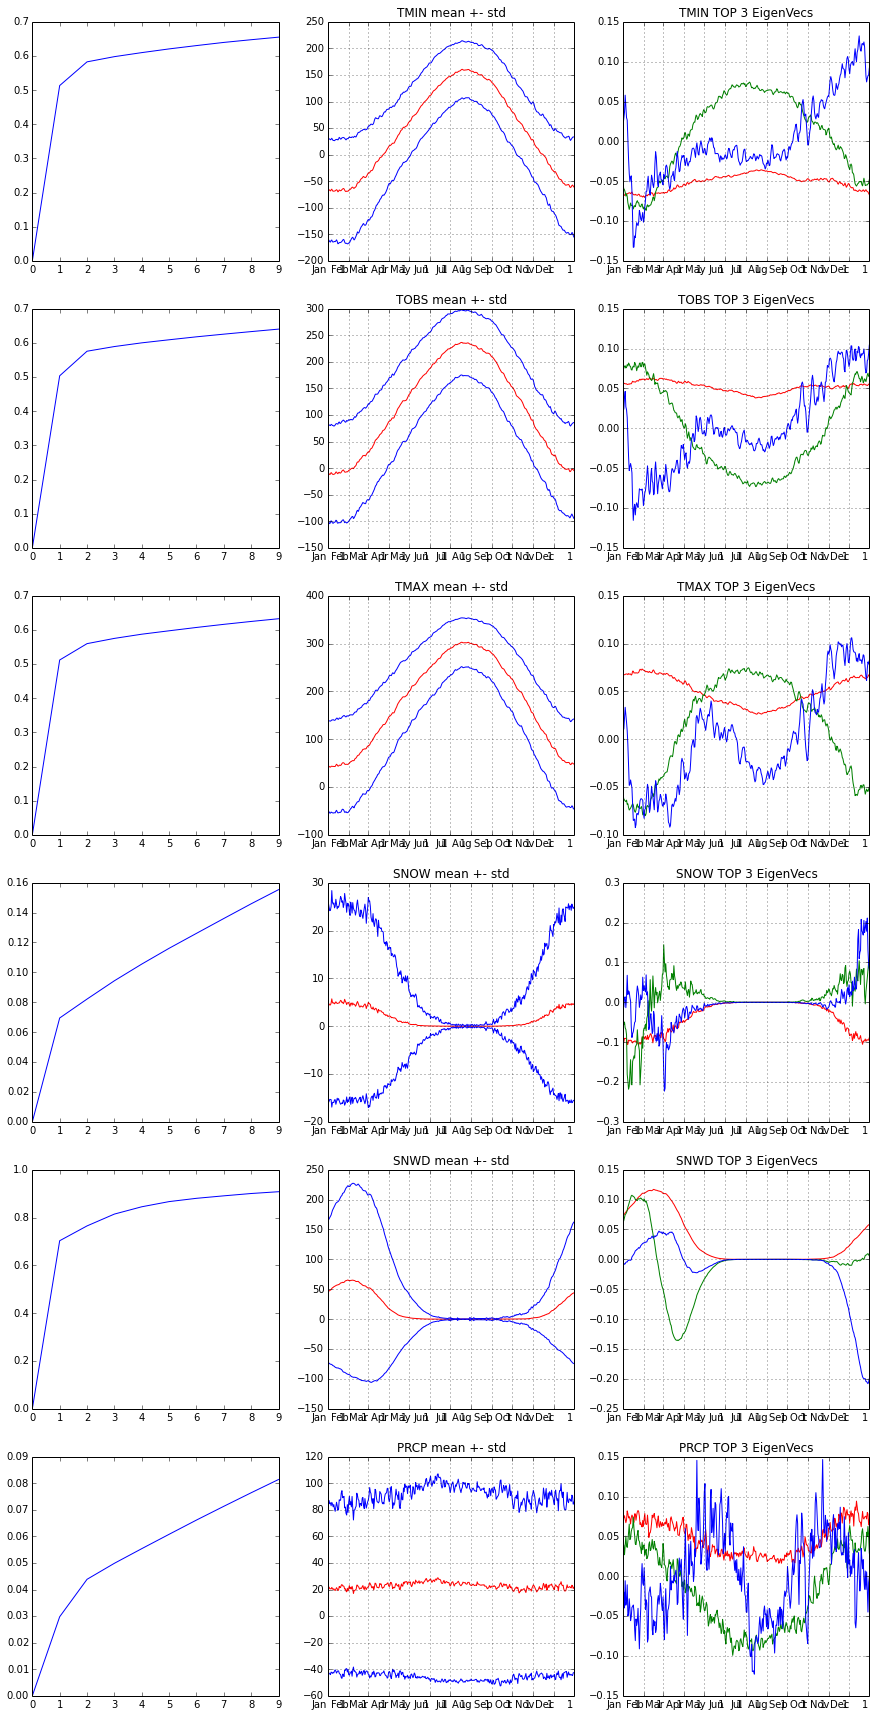

In [15]:
figure(figsize=(15,30))
offset=1
# val_vec = {}
# for i in range(len(STAT[meas]['eigval'])):
#     val_vec[STAT[meas]['eigval'][i]] = STAT[meas]['eigvec'][i]

for meas in STAT.keys():
    mpl.rcParams['axes.color_cycle']=['b']
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    eigen_val = STAT[meas]['eigval'][:]
    var_sum = sum(eigen_val)
    perc = [0]+list(eigen_val[:9])[:]
    for i in range(1,10):
        perc[i] +=perc[i-1]
    perc=map(lambda x:x/var_sum,perc)
    plot([0,1,2,3,4,5,6,7,8,9],perc)

# Mid
    mpl.rcParams['axes.color_cycle']=['r','b','b']
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    y=STAT[meas]['Mean']
    up = map(lambda x: x+STAT[meas]['std'], y)
    down = map(lambda x: x-STAT[meas]['std'], y)

#     ym,xm = setlim(meas)

    YearlyPlots(STAT[meas]['Mean'],ttl = meas+" mean +- std")
    YearlyPlots(STAT[meas]['Mean']+np.sqrt(STAT[meas]['Var']),ttl = meas+" mean +- std")
    YearlyPlots(STAT[meas]['Mean']-np.sqrt(STAT[meas]['Var']),ttl = meas+" mean +- std")
    
    mpl.rcParams['axes.color_cycle']=['r','g','b']
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    top1 = [x[0] for x in STAT[meas]['eigvec']]
    top2 = [x[1] for x in STAT[meas]['eigvec']]
    top3 = [x[2] for x in STAT[meas]['eigvec']]
    YearlyPlots(top1,ttl = meas+" TOP 3 EigenVecs")
    YearlyPlots(top2,ttl = meas+" TOP 3 EigenVecs")
    YearlyPlots(top3,ttl = meas+" TOP 3 EigenVecs")